In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [19]:
# Read in all data to dataframe
path = '/Users/ivylai/Desktop/Galvanize/clean_apt_data.csv'
data = pd.read_csv(path)
# data.drop(columns = ['Unnamed: 0'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15588 entries, 0 to 15587
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15588 non-null  int64  
 1   url               15588 non-null  object 
 2   property_name     15588 non-null  object 
 3   city              15588 non-null  object 
 4   rent_updated      15588 non-null  float64
 5   n_bed             15588 non-null  int64  
 6   n_bath            15588 non-null  float64
 7   sq_ft_updated     15588 non-null  float64
 8   walkscore         15588 non-null  float64
 9   allow_pet         15588 non-null  int64  
 10  minimum_lease     15588 non-null  int64  
 11  onsite_parking    15588 non-null  int64  
 12  pool              15588 non-null  int64  
 13  fitness_center    15588 non-null  int64  
 14  elevator          15588 non-null  int64  
 15  kitchen_features  15588 non-null  int64  
 16  security_system   15588 non-null  int64 

In [3]:
# Read in the data with no range
path = '/Users/ivylai/Desktop/Galvanize/clean_apt_data_norange.csv'
data_norange = pd.read_csv(path)
# data_norange.drop(columns = ['Unnamed: 0','rent_range','sq_ft_range'], inplace = True)
data_norange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7122 entries, 0 to 7121
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7122 non-null   int64  
 1   url               7122 non-null   object 
 2   property_name     7122 non-null   object 
 3   city              7122 non-null   object 
 4   rent_updated      7122 non-null   float64
 5   n_bed             7122 non-null   int64  
 6   n_bath            7122 non-null   float64
 7   sq_ft_updated     7122 non-null   float64
 8   walkscore         7122 non-null   float64
 9   allow_pet         7122 non-null   int64  
 10  minimum_lease     7122 non-null   int64  
 11  onsite_parking    7122 non-null   int64  
 12  pool              7122 non-null   int64  
 13  fitness_center    7122 non-null   int64  
 14  elevator          7122 non-null   int64  
 15  kitchen_features  7122 non-null   int64  
 16  security_system   7122 non-null   int64  


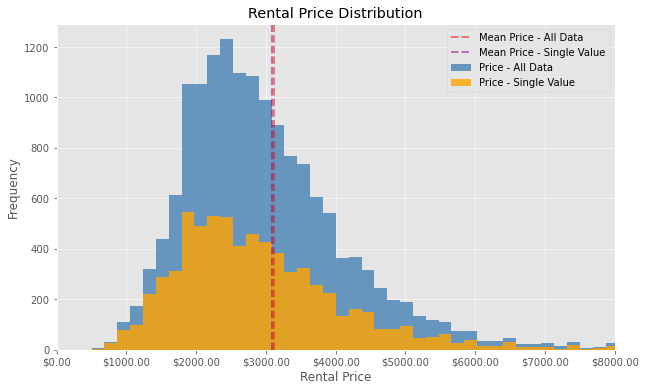

In [23]:
fig, ax = plt.subplots(figsize = (10,6))
ax.hist(data['rent_updated'], bins = 350, color = 'steelblue',alpha = 0.8, label = 'Price - All Data')
ax.axvline(x = np.mean(data['rent_updated']), c ='red', alpha = 0.5, linestyle = '--', label = 'Mean Price - All Data')
ax.hist(data_norange['rent_updated'], bins = 350, color = 'orange',  alpha = 0.8, label = 'Price - Single Value')
ax.axvline(x = np.mean(data_norange['rent_updated']), c ='purple', alpha = 0.5, linestyle = '--', label = 'Mean Price - Single Value')
ax.set_xlim(left = 0, right = 8000)
ax.xaxis.set_major_formatter('${x:1.2f}')
ax.set_xlabel('Rental Price')
ax.set_ylabel('Frequency')
ax.set_title('Rental Price Distribution')
ax.legend()

plt.savefig('rental_price_dist.png',transparent = False)

In [6]:
sum(round((data.city.value_counts()[:5])/sum(data.city.value_counts()),4) * 100)

43.61

In [7]:
sum(round((data_norange.city.value_counts()[:5])/sum(data_norange.city.value_counts()),4) * 100)

38.8

In [8]:
def plot_top_cities(data, n_cities, color, title):
    city_lst = []
    cities, count = np.unique(data['city'].to_numpy(), return_counts = True)
    for city, n in zip(cities, count):
        city_lst.append((city, n))

    sorted_city = sorted(city_lst,key=lambda x: x[1], reverse=True)
    top5_cities = [x[0] for x in sorted_city[:n_cities]][::-1]
    top5_n = [x[1] for x in sorted_city[:n_cities]][::-1]
    
    fig, ax = plt.subplots(figsize = (6,4))

    ax.barh(top5_cities, top5_n, color = color, alpha = 0.8)
    ax.set_xlabel('Number of Listings')
    ax.set_title(title)

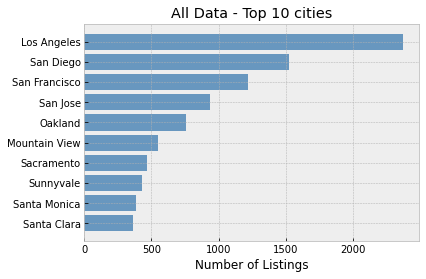

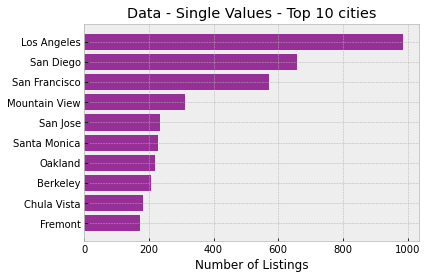

In [9]:
plot_top_cities(data, 10, color = 'steelblue', title = 'All Data - Top 10 cities')
plot_top_cities(data_norange, 10, color = 'purple', title = 'Data - Single Values - Top 10 cities')

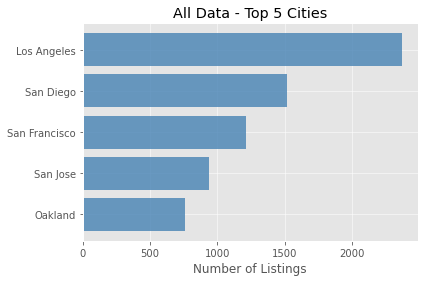

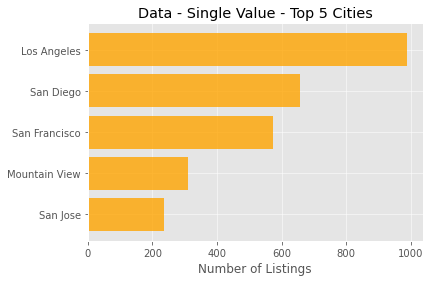

In [24]:
ax1 = plot_top_cities(data,5,'steelblue', 'All Data - Top 5 Cities')
ax2 = plot_top_cities(data_norange,5, 'orange','Data - Single Value - Top 5 Cities')

In [13]:
def plot_aptsize_heatmap(data, color, title = None):
    data1 = data.rename(columns = {'rent_updated':'Rental Price','n_bed':'Number of Beds',
                                   'n_bath':'Number of Baths', 'sq_ft_updated':'SQ-FT'})
    apt_size_data = data1[['Rental Price', 'Number of Beds', 'Number of Baths', 'SQ-FT']]
    corr_matrix = apt_size_data.corr()
    fig, ax = plt.subplots(figsize = (5,5))
    chart = sns.heatmap(corr_matrix,annot=True,ax=ax, square=True, cmap = color,fmt='0.0%', cbar = False)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    
    if title != None:
        ax.set_title(title)
    
    return apt_size_data

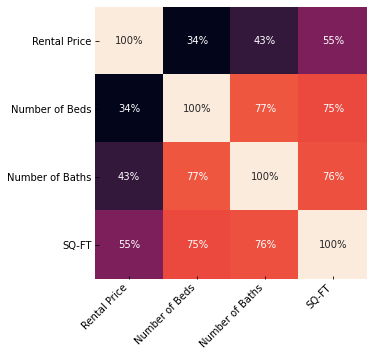

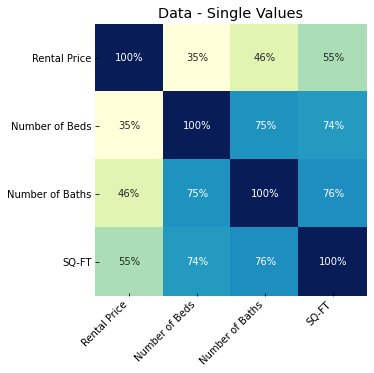

In [14]:
data_aptsize = plot_aptsize_heatmap(data, None, None)
data_nr_aptsize = plot_aptsize_heatmap(data_norange, "YlGnBu", 'Data - Single Values')

array([[<AxesSubplot:xlabel='Rental Price', ylabel='Rental Price'>,
        <AxesSubplot:xlabel='Number of Beds', ylabel='Rental Price'>,
        <AxesSubplot:xlabel='Number of Baths', ylabel='Rental Price'>,
        <AxesSubplot:xlabel='SQ-FT', ylabel='Rental Price'>],
       [<AxesSubplot:xlabel='Rental Price', ylabel='Number of Beds'>,
        <AxesSubplot:xlabel='Number of Beds', ylabel='Number of Beds'>,
        <AxesSubplot:xlabel='Number of Baths', ylabel='Number of Beds'>,
        <AxesSubplot:xlabel='SQ-FT', ylabel='Number of Beds'>],
       [<AxesSubplot:xlabel='Rental Price', ylabel='Number of Baths'>,
        <AxesSubplot:xlabel='Number of Beds', ylabel='Number of Baths'>,
        <AxesSubplot:xlabel='Number of Baths', ylabel='Number of Baths'>,
        <AxesSubplot:xlabel='SQ-FT', ylabel='Number of Baths'>],
       [<AxesSubplot:xlabel='Rental Price', ylabel='SQ-FT'>,
        <AxesSubplot:xlabel='Number of Beds', ylabel='SQ-FT'>,
        <AxesSubplot:xlabel='Number of Bath

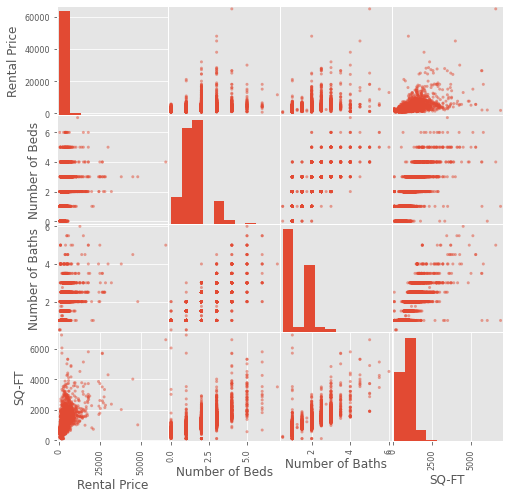

In [115]:
pd.plotting.scatter_matrix(data_aptsize, figsize = (8,8))

Text(0.5, 1.0, 'Number of Bedrooms Distribution')

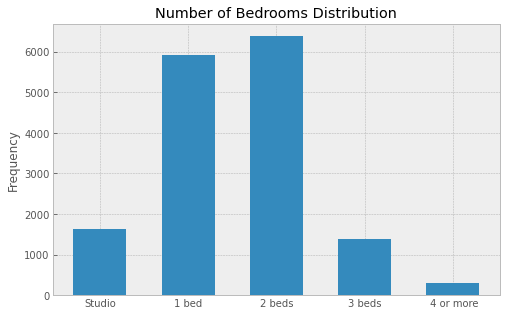

In [134]:
x = data.n_bed.value_counts()[:5]
x[4] = sum(data.n_bed.value_counts()[4:])

fig, ax = plt.subplots(figsize = (8,5))
labels = np.array(['2 beds', '1 bed', 'Studio', '3 beds', ' 4 or more'])
order = [2,1,0,3,4]
ax.bar(labels[order], x.values[order],  width = 0.6)
ax.set_ylabel('Frequency')
ax.set_title('Number of Bedrooms Distribution')

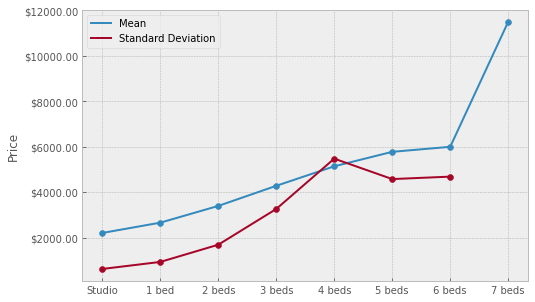

In [140]:
bed_group = data.groupby('n_bed')

names = ['Studio', '1 bed', '2 beds', '3 beds', '4 beds', '5 beds', '6 beds', '7 beds']
bed_mean = []
bed_std = []

for bed_num, bed_data in bed_group:
    bed_mean.append(bed_data.rent_updated.mean())
    bed_std.append(bed_data.rent_updated.std())

fig, ax = plt.subplots(figsize = (8,5))

x = np.arange(8)
ax.plot(x, bed_mean, label = 'Mean')
ax.scatter(x, bed_mean)
ax.plot(x, bed_std, label = 'Standard Deviation')
ax.scatter(x, bed_std)
ax.yaxis.set_major_formatter('${x:1.2f}')
ax.set_ylabel('Price')
ax.set_xticks(np.arange(8))
ax.set_xticklabels(names)
ax.legend()

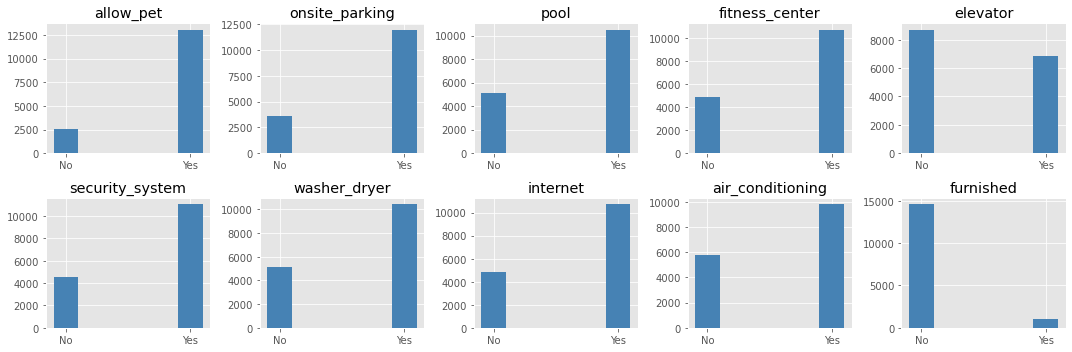

In [95]:
binary_data = data[['allow_pet', 'onsite_parking', 'pool', 'fitness_center', 'elevator',
      'security_system', 'washer_dryer', 'internet','air_conditioning', 'furnished']]

fig,axs = plt.subplots(2,5,figsize = (15,5))
for i, ax in enumerate(axs.flatten()):
    data_count = data[binary_data.columns[i]].value_counts().sort_index()
    ax.bar(['No', 'Yes'], data_count, width = 0.2, color = 'steelblue')
    ax.set_title(binary_data.columns[i])

fig.tight_layout()

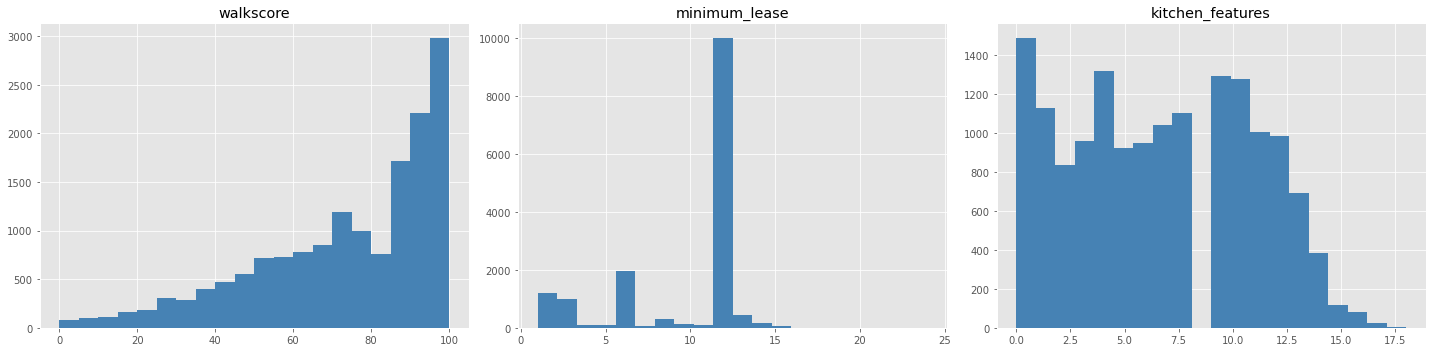

In [114]:
numeric_data = data[[ 'walkscore','minimum_lease','kitchen_features']]

fig,axs = plt.subplots(1,3,figsize = (20,5))
for i, ax in enumerate(axs.flatten()):
    ax.hist(numeric_data[numeric_data.columns[i]], color = 'steelblue', bins = 20)
    ax.set_title(numeric_data.columns[i])

fig.tight_layout()